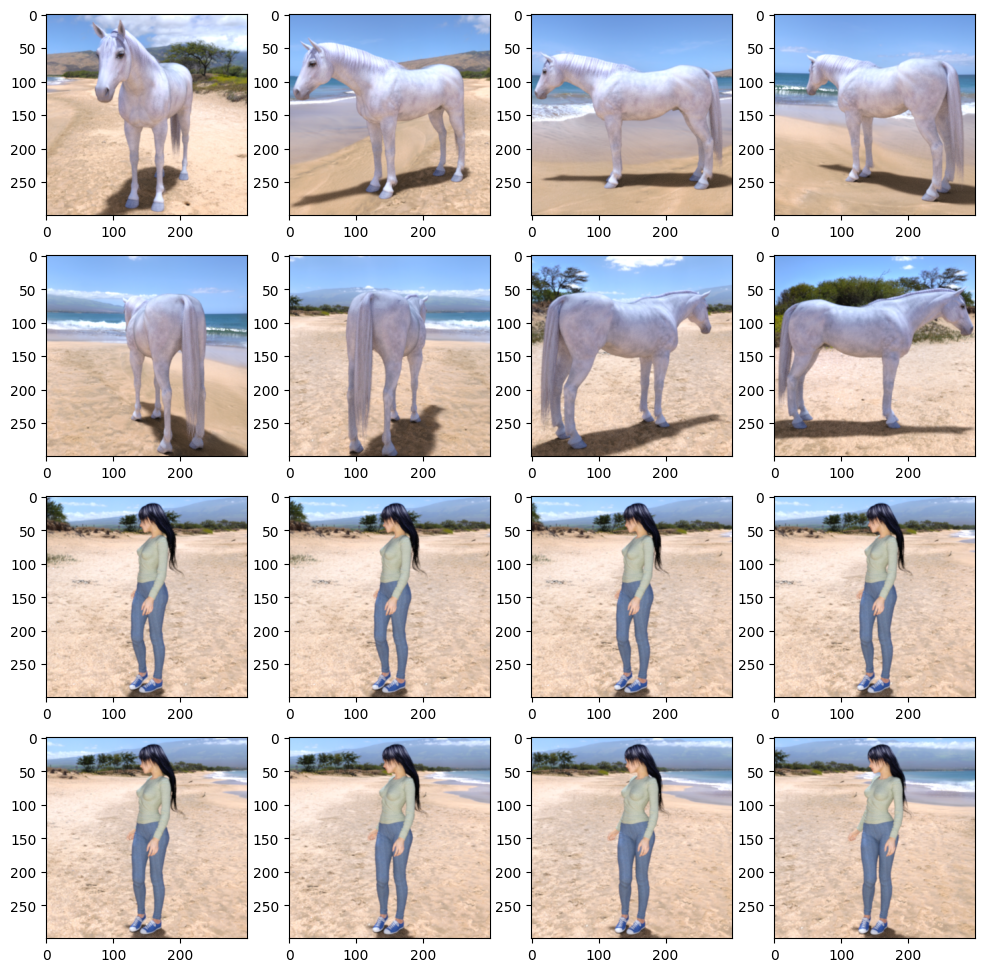

In [14]:
import matplotlib.pyplot as plt 
import os

horse_dir="Dataset/horses"
human_dir="Dataset/humans"
horse_file=os.listdir(horse_dir)
human_file=os.listdir(human_dir)

fig=plt.gcf()
fig.set_size_inches(12,12)

horse_image= [os.path.join(horse_dir,file)  for file in horse_file[:8]]
human_image= [os.path.join(human_dir,file)  for file in human_file[:8]]
for i,image in enumerate(horse_image+human_image):
    plt.subplot(4,4,i+1)
    img=plt.imread(image)
    plt.imshow(img)
plt.show()

In [31]:
import zipfile

zip_file="validation-horse-or-human.zip"
zip_ref=zipfile.ZipFile(zip_file,'r')
zip_ref.extractall("Validation/")
zip_ref.close()

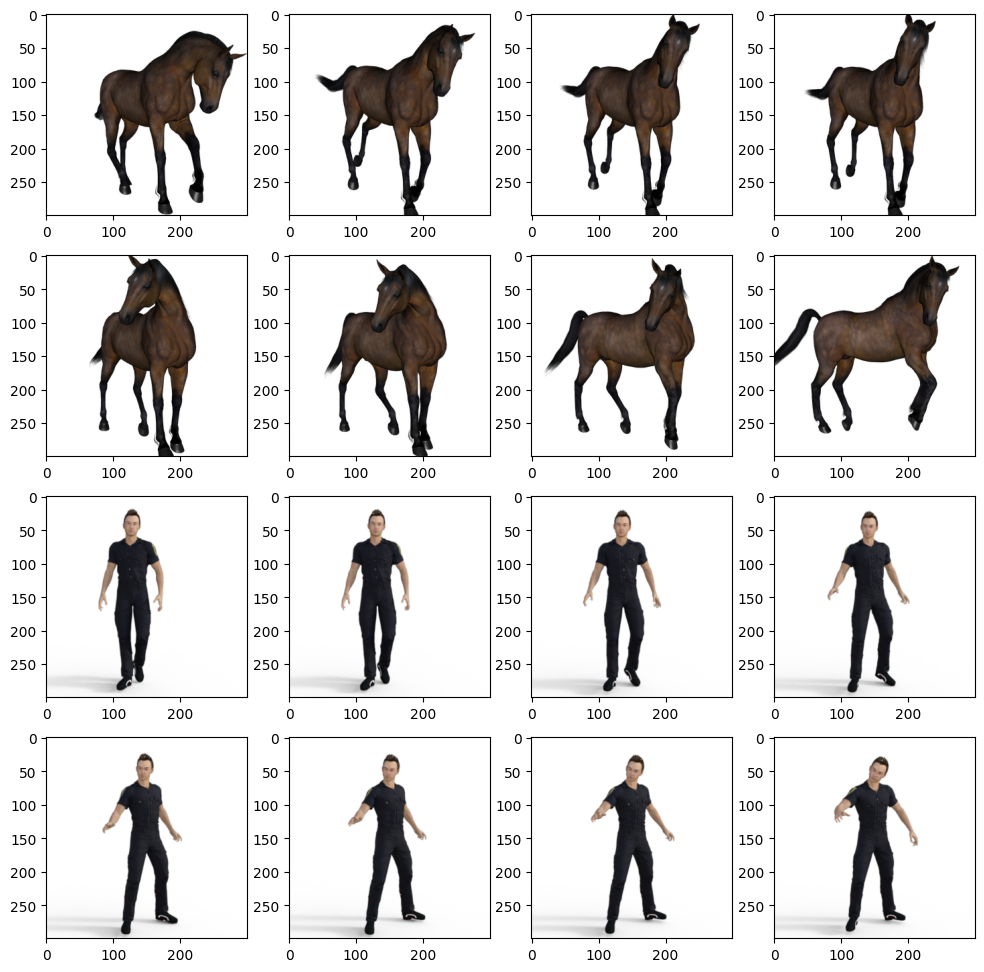

In [33]:
import matplotlib.pyplot as plt 
import os

horse_dir="Validation/horses"
human_dir="Validation/humans"
horse_file=os.listdir(horse_dir)
human_file=os.listdir(human_dir)

fig=plt.gcf()
fig.set_size_inches(12,12)

horse_image= [os.path.join(horse_dir,file)  for file in horse_file[:8]]
human_image= [os.path.join(human_dir,file)  for file in human_file[:8]]
for i,image in enumerate(horse_image+human_image):
    plt.subplot(4,4,i+1)
    img=plt.imread(image)
    plt.imshow(img)
plt.show()

In [24]:
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 35, 35, 64)       

In [28]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=(1/255))
validation_gen=ImageDataGenerator(rescale=(1/255))

train_generator=train_gen.flow_from_directory(
    "Dataset/",
    batch_size=128,
    class_mode='binary',
    target_size=(300,300)
)

validation_generator=validation_gen.flow_from_directory(
    "Validation/",
    batch_size=32,
    class_mode='binary',
    target_size=(300,300)
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [38]:
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 54s 6s/step - loss: 0.6880 - accuracy: 0.5206 - val_loss: 0.6271 - val_accuracy: 0.5898
Epoch 2/15
8/8 [==============================] - 38s 5s/step - loss: 0.7136 - accuracy: 0.7158 - val_loss: 0.5194 - val_accuracy: 0.8242
Epoch 3/15
8/8 [==============================] - 37s 4s/step - loss: 0.5030 - accuracy: 0.8165 - val_loss: 0.4311 - val_accuracy: 0.8164
Epoch 4/15
8/8 [==============================] - 48s 6s/step - loss: 0.2848 - accuracy: 0.8888 - val_loss: 0.3170 - val_accuracy: 0.8945
Epoch 5/15
8/8 [==============================] - 48s 5s/step - loss: 0.1914 - accuracy: 0.9255 - val_loss: 0.9864 - val_accuracy: 0.8438
Epoch 6/15
8/8 [==============================] - 44s 5s/step - loss: 0.3308 - accuracy: 0.8654 - val_loss: 0.5170 - val_accuracy: 0.8828
Epoch 7/15
8/8 [==============================] - 43s 5s/step - loss: 0.1751 - accuracy: 0.9277 - val_loss: 0.8700 - val_accuracy: 0.8633
Epoch 8/15
8/8 [==================

In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare image
img_path = "G:/Camera/20210629_183502.jpg"  # replace with your image path
img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Predict
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])

if classes[0]>0.5:
    print("The image is a human")
else:
    print("The image is a horse")

1/1 [==============================] - 0s 382ms/step
[0.9110407]
The image is a human
